In [1]:
import copy
from seaborn.utils import os, np, plt, pd
import seaborn as sns
from sklearn import preprocessing as s_prep

In [2]:
pd.set_option('display.max_columns', 500,
             'display.precision', 2)

In [3]:
sns.set_style('darkgrid')

In [4]:
from project_methods import MSc_Proj as proj

In [5]:
file_loc = proj.show_saved_csv()
display(file_loc)

{'W:\\MSc-AIDS-UoH\\Trimester_3\\clean_pds\\': ['enrl_comb.csv',
  'enrl_nonph.csv',
  'enrl_nutsup.csv',
  'enrl_per_vis.csv',
  'enrl_pharm.csv',
  'enr_part_prof.csv',
  'only6_visits.csv']}

In [6]:
data_dir = [str(k) for k, v in file_loc.items()][0]
data_dir

'W:\\MSc-AIDS-UoH\\Trimester_3\\clean_pds\\'

## OVERALL OBSERVATIONS in enroll.csv

In [7]:
fname = 'enr_part_prof.csv'
main_df = pd.read_csv(data_dir+fname)
display(main_df.info(), main_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67096 entries, 0 to 67095
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   subjid                       67096 non-null  object 
 1   visitnum                     67096 non-null  int64  
 2   region                       67096 non-null  object 
 3   ccdep                        67096 non-null  int64  
 4   cccog                        67096 non-null  int64  
 5   ccapt                        67096 non-null  int64  
 6   ccmtr                        67096 non-null  int64  
 7   weight                       67096 non-null  float64
 8   height                       67096 non-null  float64
 9   bmi                          67096 non-null  float64
 10  seq                          67096 non-null  int64  
 11  visdy                        67096 non-null  int64  
 12  manifested_chorea            67096 non-null  int64  
 13  motscore        

None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67091,R999989129,1,Europe,1,1,1,1,73.0,180.0,22.5,1,0,1,32,32,80,20,20,9,0,6,6,1,1,1,1,1,1,1,0.0,1. normal,0,-999.0,-999,30,[0.0 to 1.0),6,1,32.0,32.0,80.0,20.0,20.0,9.0,0.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.5,22.5,22.5,0.0,manifest,manifest,1,0,0,1,1,19,45
67092,R999993234,4,Europe,1,0,1,0,57.0,168.0,20.2,1,0,0,0,0,100,25,25,13,0,0,0,1,1,1,1,1,1,1,3.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67093,R999993234,4,Europe,1,0,1,0,57.3,167.6,20.4,2,380,1,1,1,100,25,25,13,0,0,8,1,1,1,1,1,1,1,3.2,1. normal,0,0.2,1,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41
67094,R999993234,4,Europe,1,0,1,0,57.0,167.0,20.4,3,777,1,2,2,100,25,25,13,0,0,6,1,1,1,1,1,1,1,3.2,1. normal,0,0.0,0,30,[0.0 to 1.0),7,1,0.8,0.8,100.0,25.0,25.0,13.0,0.8,0.2,3.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.6,20.2,21.5,1.3,pre-manifest,pre-manifest,0,0,0,1,0,17,41


In [8]:
cond = (main_df['visitnum'] == 6)
vis6_main_df = main_df.loc[cond].reset_index()
display(vis6_main_df)

,index,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,weight,height,bmi,seq,visdy,manifested_chorea,motscore,miscore,indepscl,fiscore,fascore,tfcscore,depscore,aptscore,exfscore,prepmeal,feedself,pubtrans,walknbr,walkfall,walkhelp,grocery,study_timeyr,bmi_level,bmi_outcome,bmi_diff,bmi_change,bmi_diff_class,bmi_diff_band,age_group,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num
0,0,R000024542,6,Northern America,0,0,0,1,67.9,185.4,19.8,1,0,1,28,28,95,24,24,11,8,1,6,1,1,1,1,1,1,1,5.2,1. normal,0,-999.0,-999,30,[0.0 to 1.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
1,1,R000024542,6,Northern America,0,0,0,1,67.2,185.0,19.6,2,371,1,32,32,80,22,22,11,4,3,8,1,1,1,1,1,1,1,5.2,1. normal,0,-0.2,-1,29,[-1.0 to 0.0),7,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
2,2,R000024542,6,Northern America,0,0,0,1,65.4,185.0,19.1,3,734,1,45,45,75,20,20,11,3,2,2,0,1,0,1,1,1,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
3,3,R000024542,6,Northern America,0,0,0,1,63.8,185.0,18.6,4,1098,1,45,45,65,12,12,8,0,9,2,0,1,0,1,1,0,0,5.2,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
4,4,R000024542,6,Northern America,0,0,0,1,62.5,185.0,18.3,5,1469,1,47,47,70,15,15,6,0,0,6,1,1,0,0,1,1,0,5.2,0. underweight,-1,-0.3,-1,29,[-1.0 to 0.0),8,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,18.8,19.8,17.5,-2.3,manifest,manifest,1,0,0,0,1,19,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9325,67086,R99990772X,6,Europe,1,0,0,1,74.5,172.7,25.0,2,343,1,32,32,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.4,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
9326,67087,R99990772X,6,Europe,1,0,0,1,75.5,172.0,25.5,3,698,1,34,34,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,0.5,1,30,[0.0 to 1.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
9327,67088,R99990772X,6,Europe,1,0,0,1,74.0,172.0,25.0,4,1098,1,34,34,85,23,23,11,1,0,0,1,1,1,1,1,1,1,5.6,2. overweight,1,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41
9328,67089,R99990772X,6,Europe,1,0,0,1,72.4,172.0,24.5,5,1426,1,40,40,85,23,23,11,0,0,0,1,1,1,1,1,1,1,5.6,1. normal,0,-0.5,-1,29,[-1.0 to 0.0),12,1,35.0,35.0,85.0,23.0,23.0,11.0,0.7,0.2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,25.1,25.4,25.1,-0.3,manifest,manifest,1,0,0,1,1,24,41


In [9]:
fname = 'enrl_per_vis.csv'
all_vis = pd.read_csv(data_dir+fname)
display(all_vis.info(), all_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21116 entries, 0 to 21115
Columns: 474 entries, subjid to total_bmi_level
dtypes: float64(410), int64(15), object(49)
memory usage: 76.4+ MB


C:\Users\welcome\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (362,363,364,365,366,437,438,439,440,441,467,468,469,470,471) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,weight_vis_7,weight_vis_8,weight_vis_9,weight_vis_10,weight_vis_11,weight_vis_12,weight_vis_13,weight_vis_14,weight_vis_15,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,height_vis_7,height_vis_8,height_vis_9,height_vis_10,height_vis_11,height_vis_12,height_vis_13,height_vis_14,height_vis_15,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,bmi_vis_7,bmi_vis_8,bmi_vis_9,bmi_vis_10,bmi_vis_11,bmi_vis_12,bmi_vis_13,bmi_vis_14,bmi_vis_15,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,visdy_vis_7,visdy_vis_8,visdy_vis_9,visdy_vis_10,visdy_vis_11,visdy_vis_12,visdy_vis_13,visdy_vis_14,visdy_vis_15,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,manifested_chorea_vis_7,manifested_chorea_vis_8,manifested_chorea_vis_9,manifested_chorea_vis_10,manifested_chorea_vis_11,manifested_chorea_vis_12,manifested_chorea_vis_13,manifested_chorea_vis_14,manifested_chorea_vis_15,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,motscore_vis_7,motscore_vis_8,motscore_vis_9,motscore_vis_10,motscore_vis_11,motscore_vis_12,motscore_vis_13,motscore_vis_14,motscore_vis_15,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,miscore_vis_7,miscore_vis_8,miscore_vis_9,miscore_vis_10,miscore_vis_11,miscore_vis_12,miscore_vis_13,miscore_vis_14,miscore_vis_15,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,indepscl_vis_7,indepscl_vis_8,indepscl_vis_9,indepscl_vis_10,indepscl_vis_11,indepscl_vis_12,indepscl_vis_13,indepscl_vis_14,indepscl_vis_15,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fiscore_vis_7,fiscore_vis_8,fiscore_vis_9,fiscore_vis_10,fiscore_vis_11,fiscore_vis_12,fiscore_vis_13,fiscore_vis_14,fiscore_vis_15,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,fascore_vis_7,fascore_vis_8,fascore_vis_9,fascore_vis_10,fascore_vis_11,fascore_vis_12,fascore_vis_13,fascore_vis_14,fascore_vis_15,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,tfcscore_vis_7,tfcscore_vis_8,tfcscore_vis_9,tfcscore_vis_10,tfcscore_vis_11,tfcscore_vis_12,tfcscore_vis_13,tfcscore_vis_14,tfcscore_vis_15,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,depscore_vis_7,depscore_vis_8,depscore_vis_9,depscore_vis_10,depscore_vis_11,depscore_vis_12,depscore_vis_13,depscore_vis_14,depscore_vis_15,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,aptscore_vis_7,aptscore_vis_8,aptscore_vis_9,aptscore_vis_10,aptscore_vis_11,aptscore_vis_12,aptscore_vis_13,aptscore_vis_14,aptscore_vis_15,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,exfscore_vis_7,exfscore_vis_8,exfscore_vis_9,exfscore_vis_10,exfscore_vis_11,exfscore_vis_12,exfscore_vis_13,exfscore_vis_14,exfscore_vis_15,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,prepmeal_vis_7,prepmeal_vis_8,prepmeal_vis_9,prepmeal_vis_10,prepmeal_vis_11,prepmeal_vis_12,prepmeal_vis_13,prepmeal_vis_14,prepmeal_vis_15,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,feedself_vis_7,feedself_vis_8,feedself_vis_9,feedself_vis_10,feedself_vis_11,feedsel

In [10]:
fname = 'only6_visits.csv'
first6_vis = pd.read_csv(data_dir+fname)
display(first6_vis.info(), first6_vis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Columns: 216 entries, subjid to caghigh_band
dtypes: float64(46), int64(147), object(23)
memory usage: 4.0+ MB


None

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),[-1.0 to 0.0),7,7,8,8,8,8,manifest,manifest,manifest,manifest,m

### CAGHIGH BAND

In [11]:
cols = ['caghigh_num', 'caghigh_band']
ch_band = pd.get_dummies(first6_vis[cols[-1]], prefix='caghigh')
display(ch_band)

first6_vis = pd.concat([first6_vis, ch_band], axis=1)
display(proj.get_columns_with_pattern(first6_vis, 'caghigh'))

,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
2437,1,0,0,0
2438,0,0,0,1
2439,0,0,0,1
2440,0,0,0,1


,caghigh_num,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
0,44,3. full penetrance,0,0,0,1
1,41,3. full penetrance,0,0,0,1
2,38,2. reduced penetrance,0,0,1,0
3,45,3. full penetrance,0,0,0,1
4,41,3. full penetrance,0,0,0,1
...,...,...,...,...,...,...
2437,19,0. normal,1,0,0,0
2438,47,3. full penetrance,0,0,0,1
2439,41,3. full penetrance,0,0,0,1
2440,42,3. full penetrance,0,0,0,1


In [12]:
ctl =  (first6_vis['hd_status0'].isin(['genotype -ve']))

ctlm = ((first6_vis['hd_status0'].isin(['genotype -ve'])) &
       (first6_vis['is_male'] == 1))

ctlf = ((first6_vis['hd_status0'].isin(['genotype -ve'])) &
       (first6_vis['is_male'] == 0))
       

control = first6_vis.loc[ctl].dropna(axis=1)

male_control = first6_vis.loc[ctlm].dropna(axis=1)

female_control = first6_vis.loc[ctlf].dropna(axis=1)

display(control['visitnum'].value_counts(), control, male_control, female_control)

6     176
7      91
8      20
9       4
10      1
12      1
15      1
Name: visitnum, dtype: int64

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
11,R002918968,8,Northern America,1,0,1,0,5.2,1,5.1,7.0,96.2,23.4,23.4,11.2,7.1,3.1,12.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,0,16,16,21.3,20.2,21.9,1.7,0,45.4,45.8,47.7,50.1,47.7,48.6,149.9,149.0,149.2,149.0,149.2,149.0,20.2,20.6,21.4,22.6,21.4,21.9,0,300,706,783,1064,1098,0,1,0,0,0,1,5,9,0,14,0,13,5,9,5,14,5,13,100,95,95,95,95,95,23,23,23,24,23,23,23,23,23,24,23,23,10,11,11,12,11,11,4,6,6,6,6,7,0,3,4,2,4,4,0,13,16,9,16,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1. normal,1. normal,1. normal,1. normal,1. normal,1. normal,0,0,0,0,0,0,-999.0,0.4,0.8,1.2,-1.2,0.5,-999,1,1,1,-1,1,30,30,30,31,28,30,[0.0 to 1.0),[0.0 to 1.0),[0.0 to 1.0),[1.0 to 2.

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
42,R013633600,6,Northern America,0,0,0,0,5.1,1,0.2,0.2,100.0,25.0,25.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,1,17,18,33.0,31.7,33.6,1.9,1,108.9,113.4,112.5,116.1,112.5,114.9,185.4,185.0,185.0,185.0,185.0,185.0,31.7,33.1,32.9,33.9,32.9,33.6,0,388,791,1116,1494,1855,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,100,100,100,100,100,100,25,25,25,25,25,25,25,25,25,25,25,25,13,13,13,13,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3. obese,3. obese,3. obese,3. obese,3. obese,3. obese,1,1,1,1,1,1,-999.0,1.4,-0.2,1.0,-1.0,0.7,-999,1,-1,1,-1,1,30,31,29,31,29,30,[0.0 to 1.0),[1.0 to 2.0),[-1.0 to 0.0),[1.0 to 2

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
11,R002918968,8,Northern America,1,0,1,0,5.2,1,5.1,7.0,96.2,23.4,23.4,11.2,7.1,3.1,12.8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,genotype -ve,0,0,0,0,0,16,16,21.3,20.2,21.9,1.7,0,45.4,45.8,47.7,50.1,47.7,48.6,149.9,149.0,149.2,149.0,149.2,149.0,20.2,20.6,21.4,22.6,21.4,21.9,0,300,706,783,1064,1098,0,1,0,0,0,1,5,9,0,14,0,13,5,9,5,14,5,13,100,95,95,95,95,95,23,23,23,24,23,23,23,23,23,24,23,23,10,11,11,12,11,11,4,6,6,6,6,7,0,3,4,2,4,4,0,13,16,9,16,16,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1. normal,1. normal,1. normal,1. normal,1. normal,1. normal,0,0,0,0,0,0,-999.0,0.4,0.8,1.2,-1.2,0.5,-999,1,1,1,-1,1,30,30,30,31,28,30,[0.0 to 1.0),[0.0 to 1.0),[0.0 to 1.0),[1.0 to 2.

In [13]:
mnf =  (first6_vis['hd_status0'] == 'manifest')

mnfm = ((first6_vis['hd_status0'] == 'manifest') &
       (first6_vis['is_male'] == 1))

mnff = ((first6_vis['hd_status0'] == 'manifest') &
       (first6_vis['is_male'] == 0))
       

manifest = first6_vis.loc[mnf].dropna(axis=1)

male_manifest = first6_vis.loc[mnfm].dropna(axis=1)

female_manifest = first6_vis.loc[mnff].dropna(axis=1)

display(manifest['visitnum'].value_counts(), manifest, male_manifest, female_manifest)

6     849
7     316
8      67
9      14
10      6
14      1
11      1
Name: visitnum, dtype: int64

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
0,R000024542,6,Northern America,0,0,0,1,5.2,1,42.8,42.8,75.0,16.7,16.7,8.8,2.5,2.5,4.2,0.5,0.8,0.8,1.0,0.7,0.3,0.3,manifest,1,0,0,0,1,19,44,18.8,19.8,17.5,-2.3,-1,67.9,67.2,65.4,63.8,62.5,59.9,185.4,185.0,185.0,185.0,185.0,185.0,19.8,19.6,19.1,18.6,18.3,17.5,0,371,734,1098,1469,1911,1,1,1,1,1,1,28,32,45,45,47,60,28,32,45,45,47,60,95,80,75,65,70,65,24,22,20,12,15,7,24,22,20,12,15,7,11,11,11,8,6,6,8,4,3,0,0,0,1,3,2,9,0,0,6,8,2,2,6,1,1,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1. normal,1. normal,1. normal,1. normal,0. underweight,0. underweight,0,0,0,0,-1,-1,-999.0,-0.2,-0.5,-0.5,-0.3,-0.8,-999,-1,-1,-1,-1,-1,30,29,29,29,29,29,[0.0 to 1.0),[-1.0 to 0.0),[-1.0 

,subjid,visitnum,region,ccdep,cccog,ccapt,ccmtr,study_timeyr,age30_above_vis1,avg_motscore,avg_miscore,avg_indepscl,avg_fiscore,avg_fascore,avg_tfcscore,avg_depscore,avg_aptscore,avg_exfscore,avg_prepmeal,avg_feedself,avg_walkhelp,avg_walkfall,avg_walknbr,avg_pubtrans,avg_grocery,hd_status0,baseline_manifest_hd,is_high_calorie,received_swallowing_therapy,had_gi_illness,is_male,caglow_num,caghigh_num,total_avg_bmi,first_bmi,last_bmi,total_bmi_diff,last_bmi_outcome,weight_vis_1,weight_vis_2,weight_vis_3,weight_vis_4,weight_vis_5,weight_vis_6,height_vis_1,height_vis_2,height_vis_3,height_vis_4,height_vis_5,height_vis_6,bmi_vis_1,bmi_vis_2,bmi_vis_3,bmi_vis_4,bmi_vis_5,bmi_vis_6,visdy_vis_1,visdy_vis_2,visdy_vis_3,visdy_vis_4,visdy_vis_5,visdy_vis_6,manifested_chorea_vis_1,manifested_chorea_vis_2,manifested_chorea_vis_3,manifested_chorea_vis_4,manifested_chorea_vis_5,manifested_chorea_vis_6,motscore_vis_1,motscore_vis_2,motscore_vis_3,motscore_vis_4,motscore_vis_5,motscore_vis_6,miscore_vis_1,miscore_vis_2,miscore_vis_3,miscore_vis_4,miscore_vis_5,miscore_vis_6,indepscl_vis_1,indepscl_vis_2,indepscl_vis_3,indepscl_vis_4,indepscl_vis_5,indepscl_vis_6,fiscore_vis_1,fiscore_vis_2,fiscore_vis_3,fiscore_vis_4,fiscore_vis_5,fiscore_vis_6,fascore_vis_1,fascore_vis_2,fascore_vis_3,fascore_vis_4,fascore_vis_5,fascore_vis_6,tfcscore_vis_1,tfcscore_vis_2,tfcscore_vis_3,tfcscore_vis_4,tfcscore_vis_5,tfcscore_vis_6,depscore_vis_1,depscore_vis_2,depscore_vis_3,depscore_vis_4,depscore_vis_5,depscore_vis_6,aptscore_vis_1,aptscore_vis_2,aptscore_vis_3,aptscore_vis_4,aptscore_vis_5,aptscore_vis_6,exfscore_vis_1,exfscore_vis_2,exfscore_vis_3,exfscore_vis_4,exfscore_vis_5,exfscore_vis_6,prepmeal_vis_1,prepmeal_vis_2,prepmeal_vis_3,prepmeal_vis_4,prepmeal_vis_5,prepmeal_vis_6,feedself_vis_1,feedself_vis_2,feedself_vis_3,feedself_vis_4,feedself_vis_5,feedself_vis_6,pubtrans_vis_1,pubtrans_vis_2,pubtrans_vis_3,pubtrans_vis_4,pubtrans_vis_5,pubtrans_vis_6,walknbr_vis_1,walknbr_vis_2,walknbr_vis_3,walknbr_vis_4,walknbr_vis_5,walknbr_vis_6,walkfall_vis_1,walkfall_vis_2,walkfall_vis_3,walkfall_vis_4,walkfall_vis_5,walkfall_vis_6,walkhelp_vis_1,walkhelp_vis_2,walkhelp_vis_3,walkhelp_vis_4,walkhelp_vis_5,walkhelp_vis_6,grocery_vis_1,grocery_vis_2,grocery_vis_3,grocery_vis_4,grocery_vis_5,grocery_vis_6,bmi_level_vis_1,bmi_level_vis_2,bmi_level_vis_3,bmi_level_vis_4,bmi_level_vis_5,bmi_level_vis_6,bmi_outcome_vis_1,bmi_outcome_vis_2,bmi_outcome_vis_3,bmi_outcome_vis_4,bmi_outcome_vis_5,bmi_outcome_vis_6,bmi_diff_vis_1,bmi_diff_vis_2,bmi_diff_vis_3,bmi_diff_vis_4,bmi_diff_vis_5,bmi_diff_vis_6,bmi_change_vis_1,bmi_change_vis_2,bmi_change_vis_3,bmi_change_vis_4,bmi_change_vis_5,bmi_change_vis_6,bmi_diff_class_vis_1,bmi_diff_class_vis_2,bmi_diff_class_vis_3,bmi_diff_class_vis_4,bmi_diff_class_vis_5,bmi_diff_class_vis_6,bmi_diff_band_vis_1,bmi_diff_band_vis_2,bmi_diff_band_vis_3,bmi_diff_band_vis_4,bmi_diff_band_vis_5,bmi_diff_band_vis_6,age_group_vis_1,age_group_vis_2,age_group_vis_3,age_group_vis_4,age_group_vis_5,age_group_vis_6,hd_status_vis_1,hd_status_vis_2,hd_status_vis_3,hd_status_vis_4,hd_status_vis_5,hd_status_vis_6,avg_bmi,avg_bmi_outcome,avg_bmi_level,caghigh_band,caghigh_0. normal,caghigh_1. intermediate,caghigh_2. reduced penetrance,caghigh_3. full penetrance
3,R000458994,6,Europe,1,1,1,1,5.2,1,115.2,115.2,19.2,1.0,1.0,0.5,2.0,10.0,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,manifest,1,0,1,0,0,17,45,21.1,20.8,24.3,3.5,0,60.0,52.0,61.0,59.0,63.5,70.2,170.0,170.0,170.0,170.0,170.0,170.0,20.8,18.0,21.1,20.4,22.0,24.3,0,392,707,1160,1566,1881,1,1,1,1,1,1,109,112,112,120,122,116,109,112,112,120,122,116,20,25,25,15,20,10,3,0,1,1,1,0,3,0,1,1,1,0,1,0,2,0,0,0,0,4,0,8,0,0,0,12,12,12,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1. normal,0. underweight,1. normal,1. normal,1. normal,1. normal,0,-1,0,0,0,0,-999.0,-2.8,3.1,-0.7,1.6,2.3,-999,-1,1,-1,1,1,30,27,33,29,31,32,[0.0 to 1.0),[-3.0 to -2.0),[3.0 to 4.0),[-1.0 to 0.

### VARIABLE ANALYSIS PER  VISIT

### BMI Level

In [14]:
ctrl_freq = proj.get_columns_with_pattern(control,
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
display(mnf_freq)

order = sorted(list(first6_vis[cols[-1]].unique()), key=lambda x: int(x.split('.')[0]))
display(order)

,0. underweight,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,4,108,84,79,19,1
bmi_level_vis_2,2,110,87,74,21,2
bmi_level_vis_3,1,102,93,78,20,3
bmi_level_vis_4,4,102,88,76,24,4
bmi_level_vis_5,3,105,90,75,21,5
bmi_level_vis_6,4,92,105,71,22,6


,0. underweight,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,56,602,410,170,16,1
bmi_level_vis_2,57,577,427,180,13,2
bmi_level_vis_3,63,609,388,177,17,3
bmi_level_vis_4,64,615,390,168,17,4
bmi_level_vis_5,75,601,398,162,18,5
bmi_level_vis_6,63,637,373,165,16,6


['0. normal', '1. intermediate', '2. reduced penetrance', '3. full penetrance']

W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI Level per Visit (Manifest)'}, xlabel='visit'>

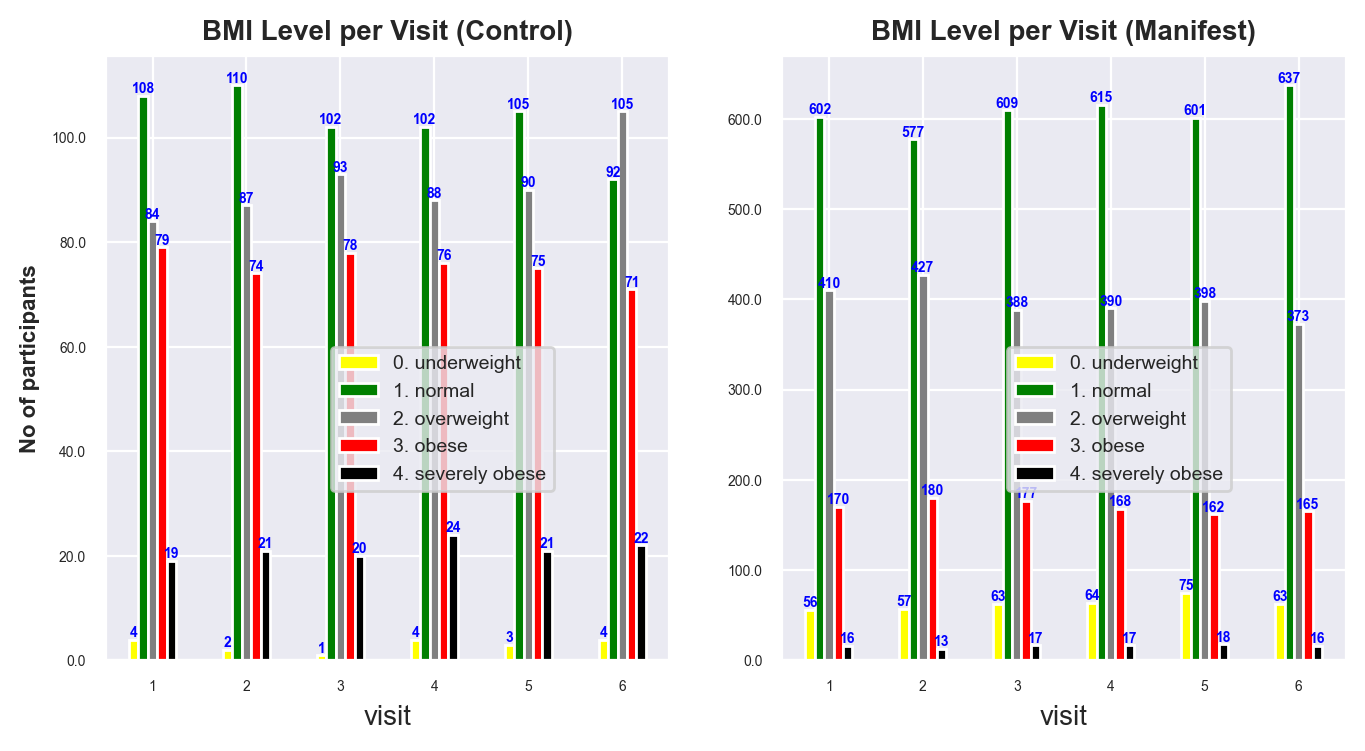

In [15]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

<AxesSubplot:title={'center':'BMI Level per Visit (Manifest)'}, xlabel='visit'>

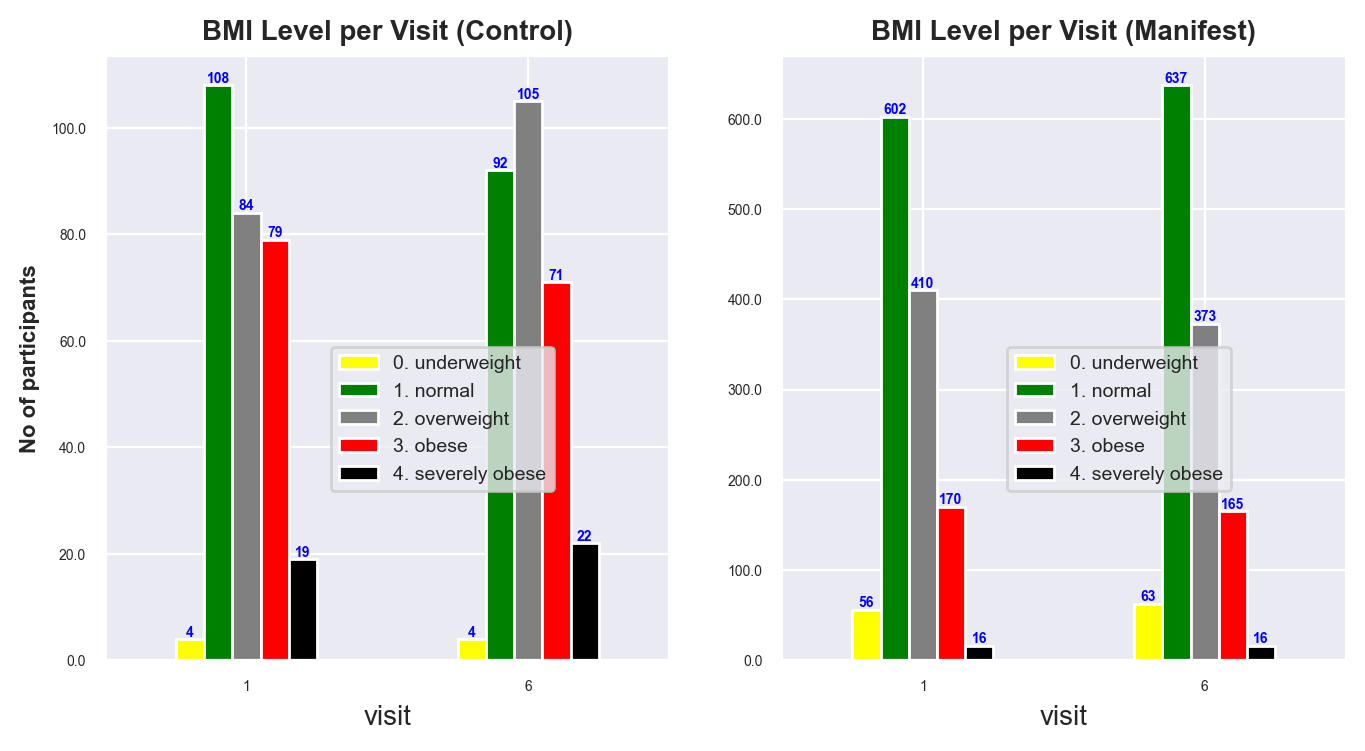

In [16]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'BMI Level per Visit (Manifest)'}, xlabel='visit'>

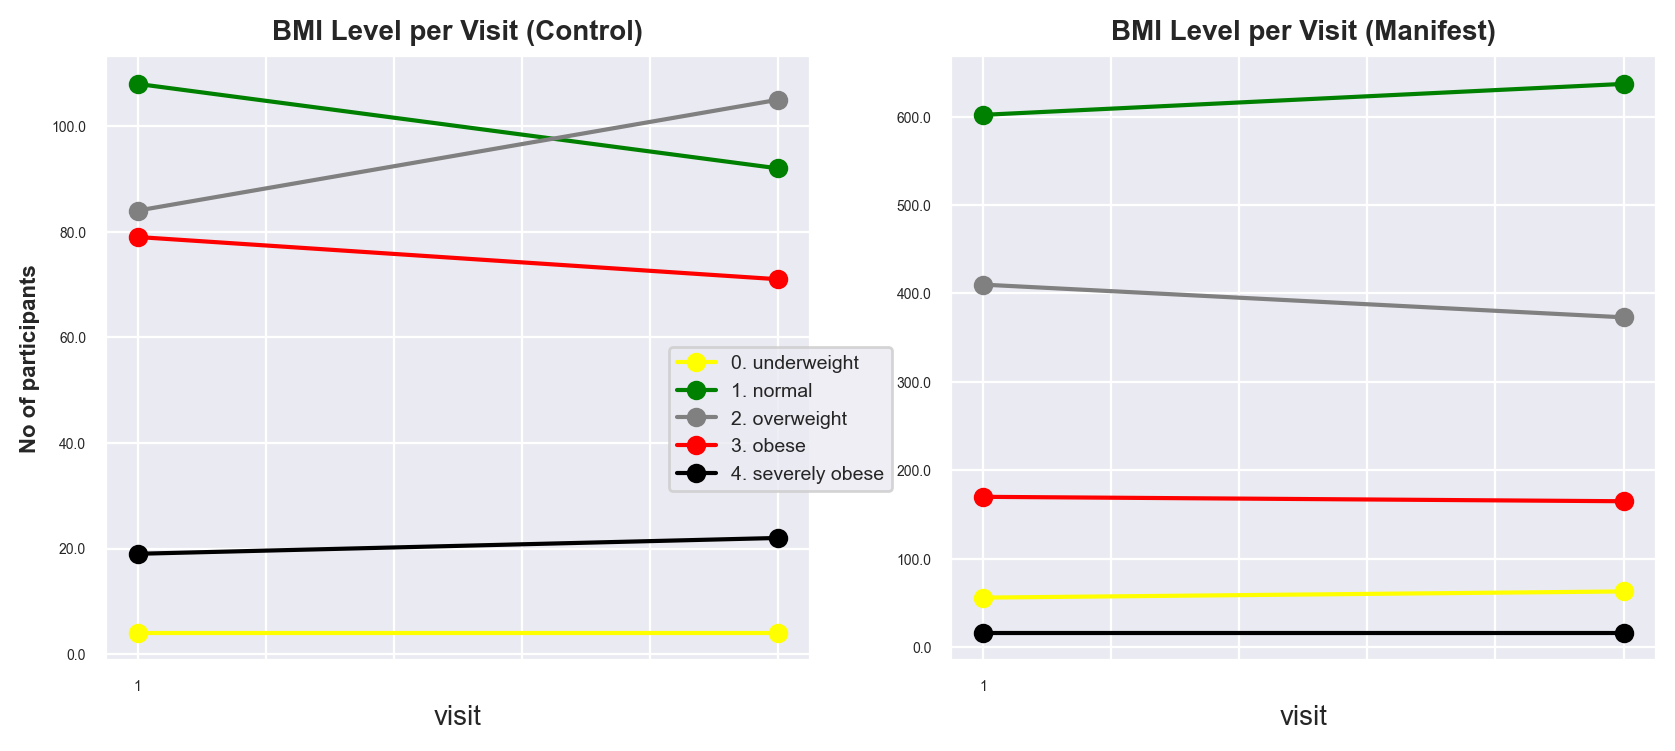

In [17]:
fig, (l, r) = plt.subplots(1, 2, figsize=(10, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=l, marker='o'), 
                 plot_title='BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.8, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=r, marker='o'),
                 plot_title='BMI Level per Visit (Manifest)', title_size=10)

#### In Percentage

In [18]:
ctrl_freq = proj.get_columns_with_pattern(control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

,visit,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,1,1.4,36.7,28.6,26.9,6.5
1,2,0.7,37.4,29.6,25.2,7.1
2,3,0.3,34.7,31.6,26.5,6.8
3,4,1.4,34.7,29.9,25.9,8.2
4,5,1.0,35.7,30.6,25.5,7.1
5,6,1.4,31.3,35.7,24.1,7.5


,visit,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,1,4.5,48.0,32.7,13.6,1.3
1,2,4.5,46.0,34.1,14.4,1.0
2,3,5.0,48.6,30.9,14.1,1.4
3,4,5.1,49.0,31.1,13.4,1.4
4,5,6.0,47.9,31.7,12.9,1.4
5,6,5.0,50.8,29.7,13.2,1.3


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%BMI Level per Visit (Manifest)'}, xlabel='visit'>

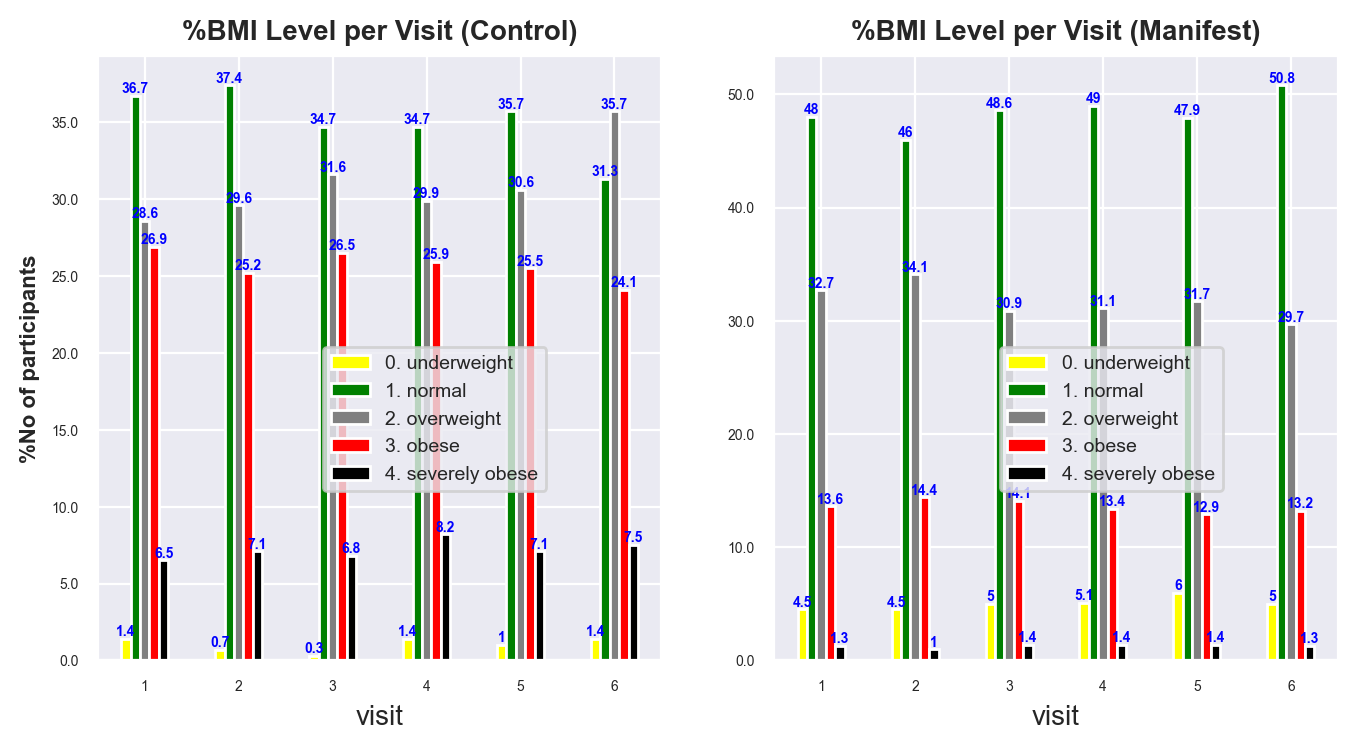

In [19]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

<AxesSubplot:title={'center':'%BMI Level per Visit (Manifest)'}, xlabel='visit'>

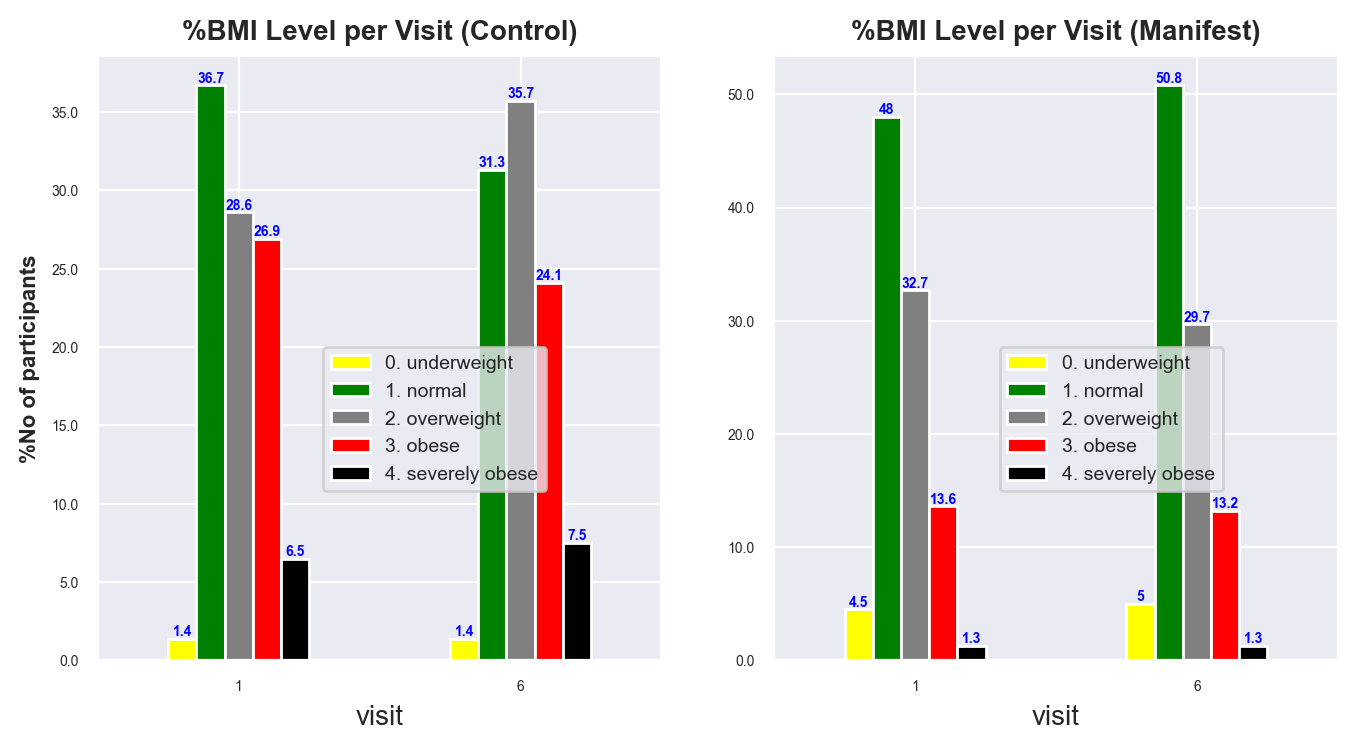

In [20]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

#### Gender Effect

In [21]:
# male pps
ctrl_freq = proj.get_columns_with_pattern(male_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
# ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(male_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
# mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,27,31,25,1,1
bmi_level_vis_2,23,37,22,2,2
bmi_level_vis_3,21,37,22,4,3
bmi_level_vis_4,22,36,23,3,4
bmi_level_vis_5,23,35,24,2,5
bmi_level_vis_6,21,39,22,2,6


,0. underweight,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,11,285,256,76,5,1
bmi_level_vis_2,12,271,267,79,4,2
bmi_level_vis_3,18,292,242,77,4,3
bmi_level_vis_4,15,294,243,76,5,4
bmi_level_vis_5,19,296,237,73,8,5
bmi_level_vis_6,23,305,231,68,6,6


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

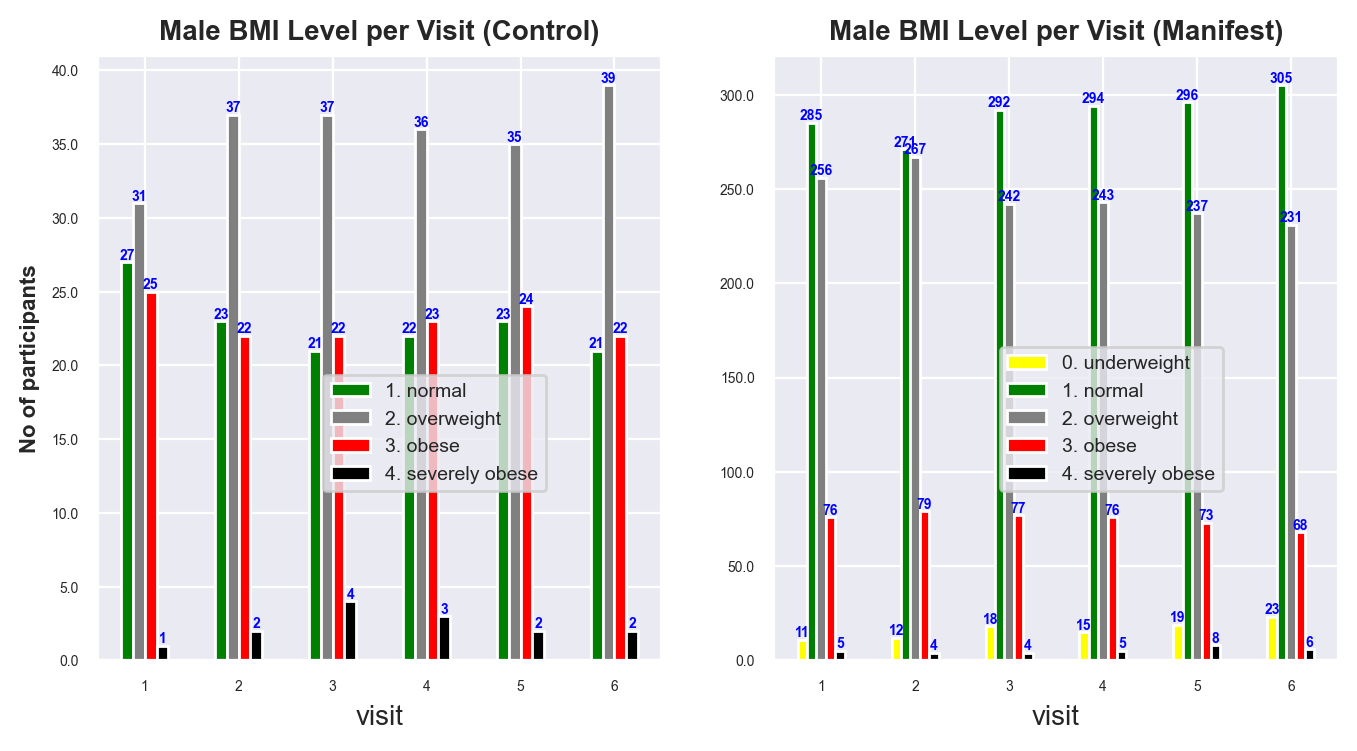

In [22]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

<AxesSubplot:title={'center':'Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

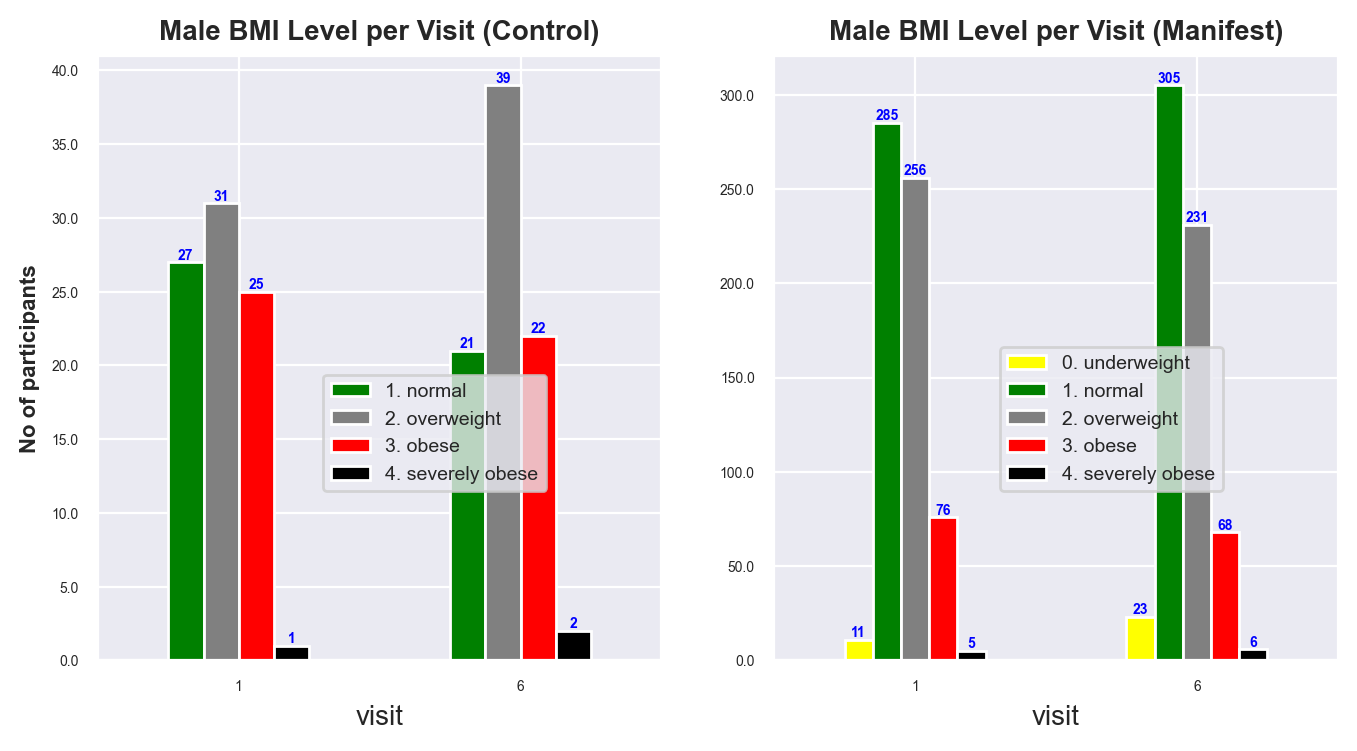

In [23]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

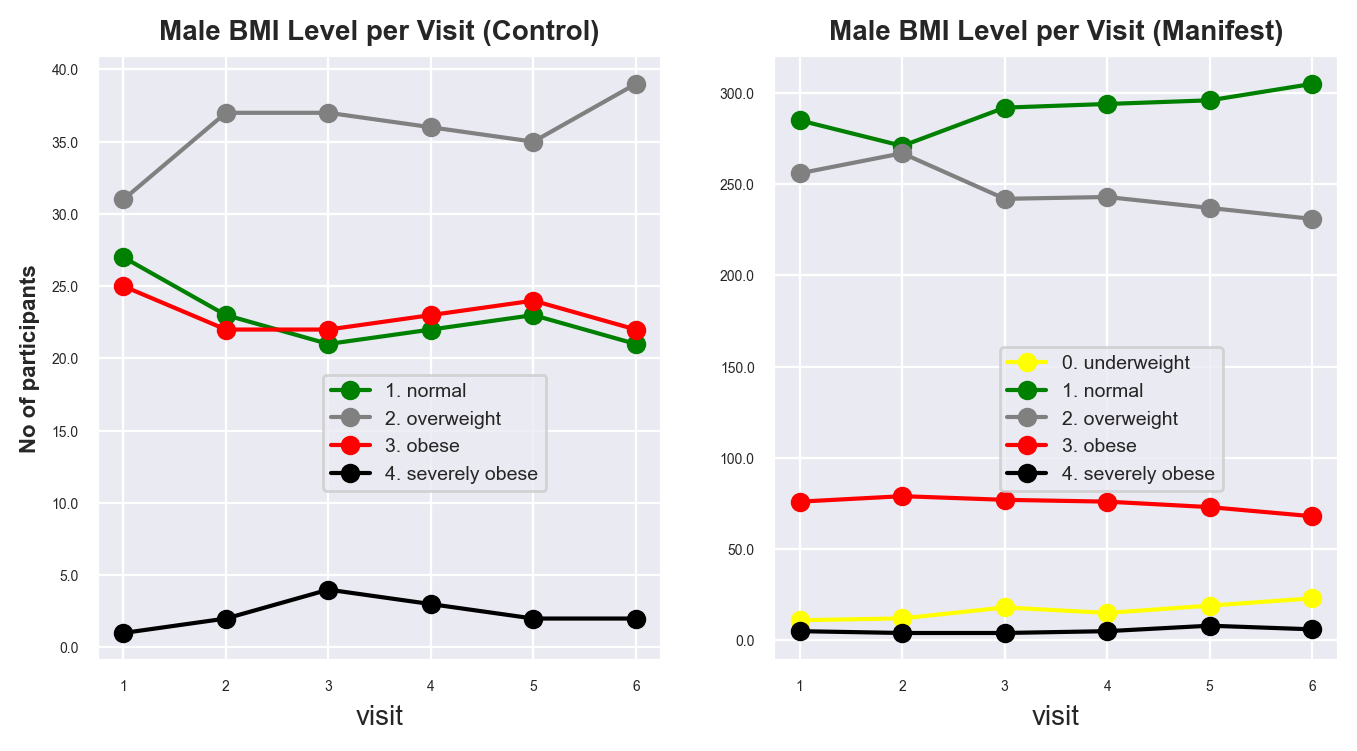

In [24]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=l, marker='o'), 
                 plot_title='Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=r, marker='o'), 
                 plot_title='Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

In [25]:
# in percentage
ctrl_freq = proj.get_columns_with_pattern(male_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts, 
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(male_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

,visit,1. normal,2. overweight,3. obese,4. severely obese
0,1,32.1,36.9,29.8,1.2
1,2,27.4,44.0,26.2,2.4
2,3,25.0,44.0,26.2,4.8
3,4,26.2,42.9,27.4,3.6
4,5,27.4,41.7,28.6,2.4
5,6,25.0,46.4,26.2,2.4


,visit,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,1,1.7,45.0,40.4,12.0,0.8
1,2,1.9,42.8,42.2,12.5,0.6
2,3,2.8,46.1,38.2,12.2,0.6
3,4,2.4,46.4,38.4,12.0,0.8
4,5,3.0,46.8,37.4,11.5,1.3
5,6,3.6,48.2,36.5,10.7,0.9


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

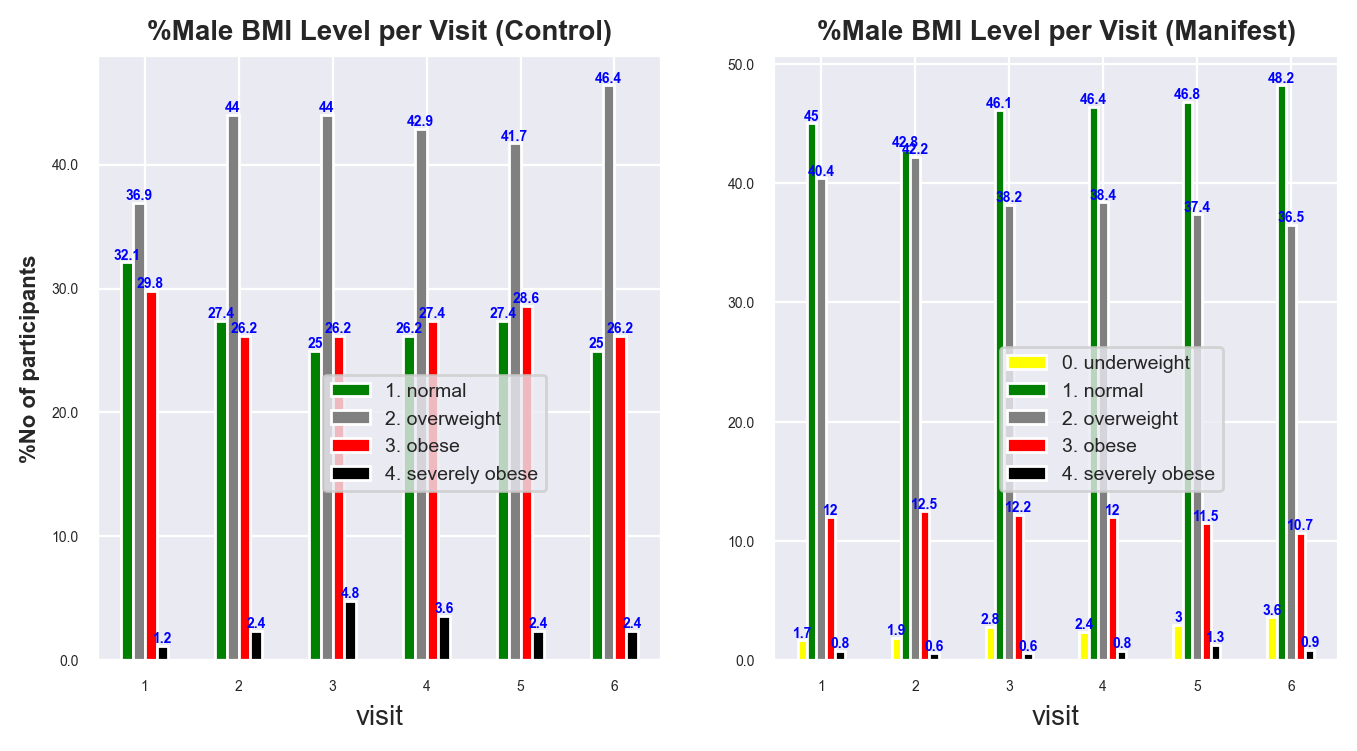

In [26]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

<AxesSubplot:title={'center':'%Male BMI Level per Visit (Manifest)'}, xlabel='visit'>

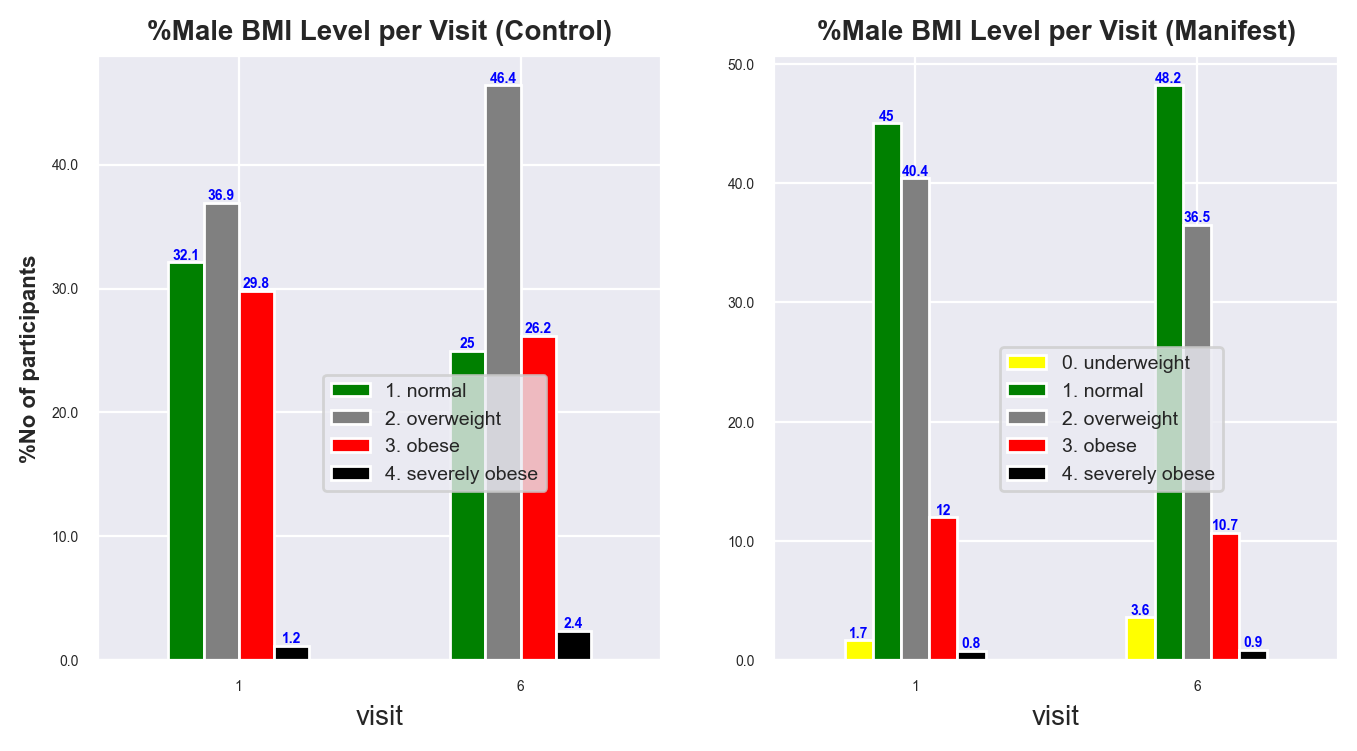

In [27]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Male BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.28])

In [28]:
# female pps
ctrl_freq = proj.get_columns_with_pattern(female_control,
                                          'bmi_level_vis').apply(pd.Series.value_counts,
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
# ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(female_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
# mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

,0. underweight,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,4,81,53,54,18,1
bmi_level_vis_2,2,87,50,52,19,2
bmi_level_vis_3,1,81,56,56,16,3
bmi_level_vis_4,4,80,52,53,21,4
bmi_level_vis_5,3,82,55,51,19,5
bmi_level_vis_6,4,71,66,49,20,6


,0. underweight,1. normal,2. overweight,3. obese,4. severely obese,visit
bmi_level_vis_1,45,317,154,94,11,1
bmi_level_vis_2,45,306,160,101,9,2
bmi_level_vis_3,45,317,146,100,13,3
bmi_level_vis_4,49,321,147,92,12,4
bmi_level_vis_5,56,305,161,89,10,5
bmi_level_vis_6,40,332,142,97,10,6


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

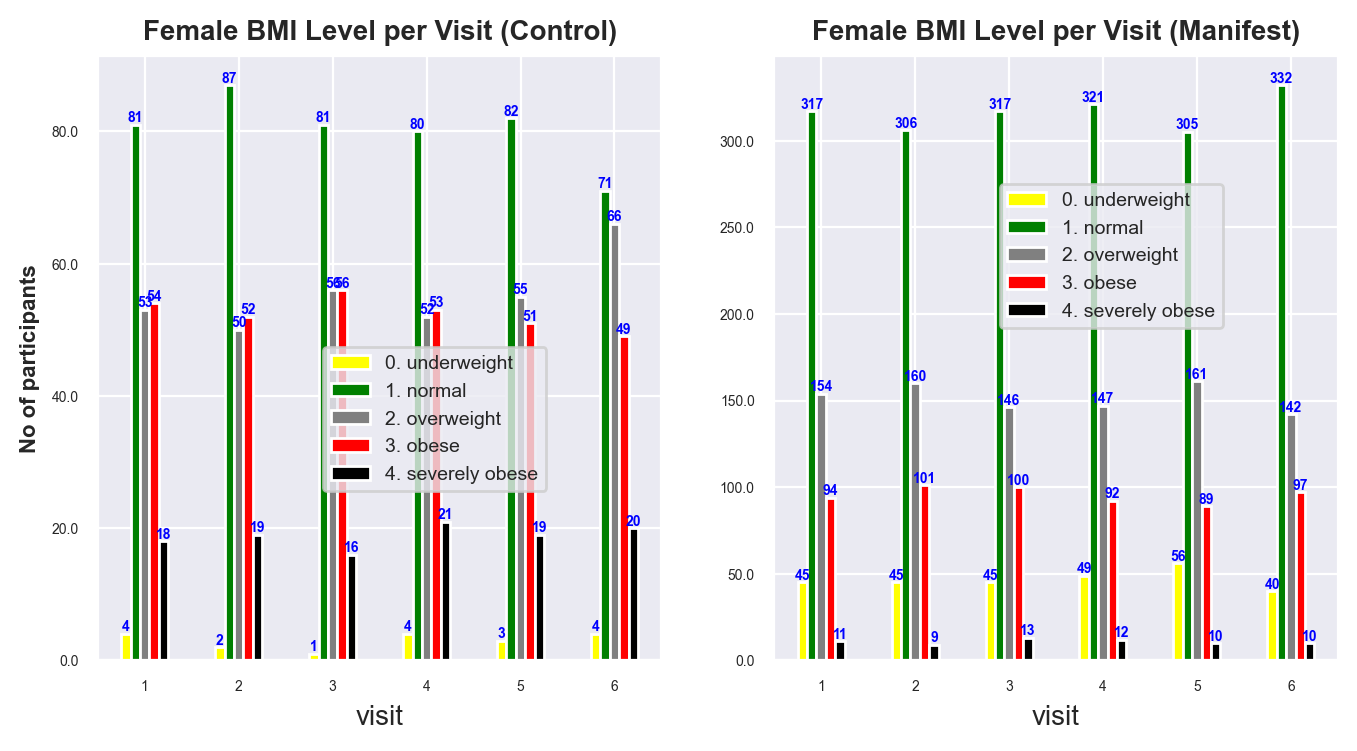

In [29]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.55])

<AxesSubplot:title={'center':'Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

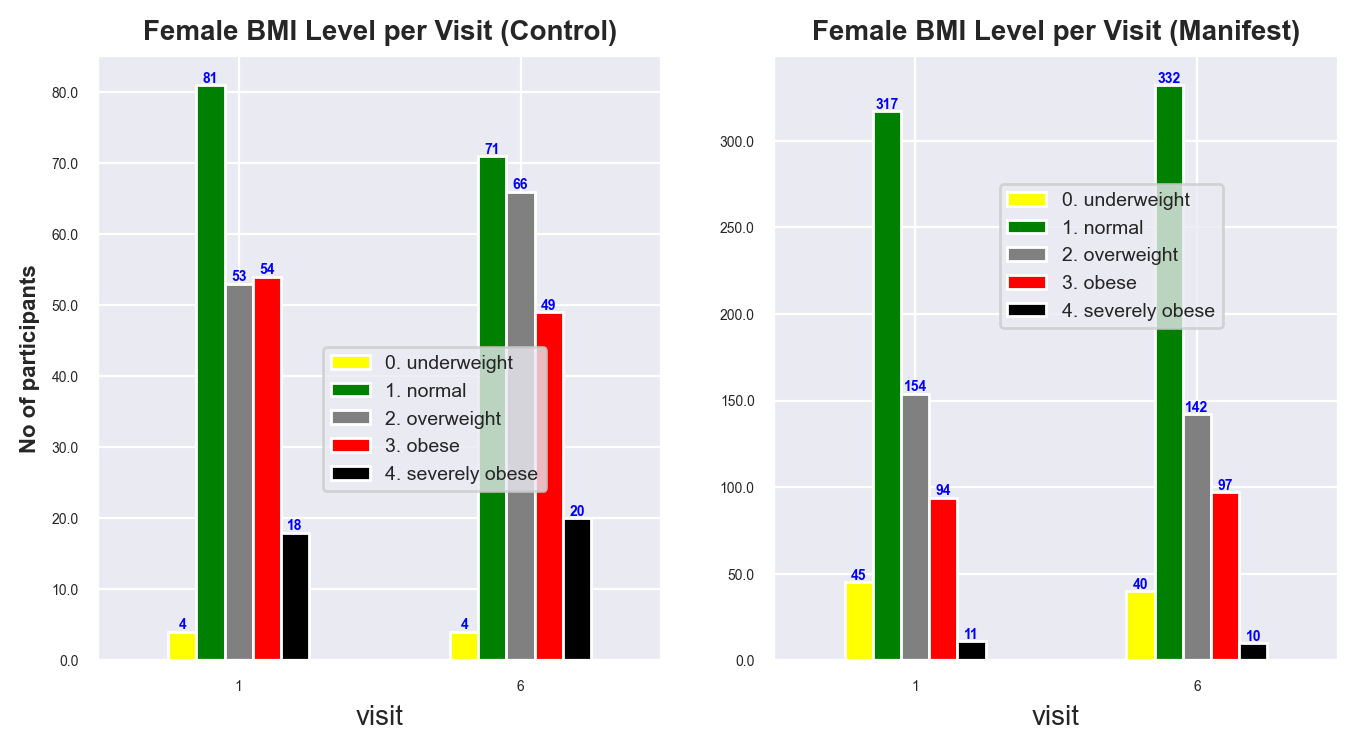

In [30]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.55])

W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})
W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

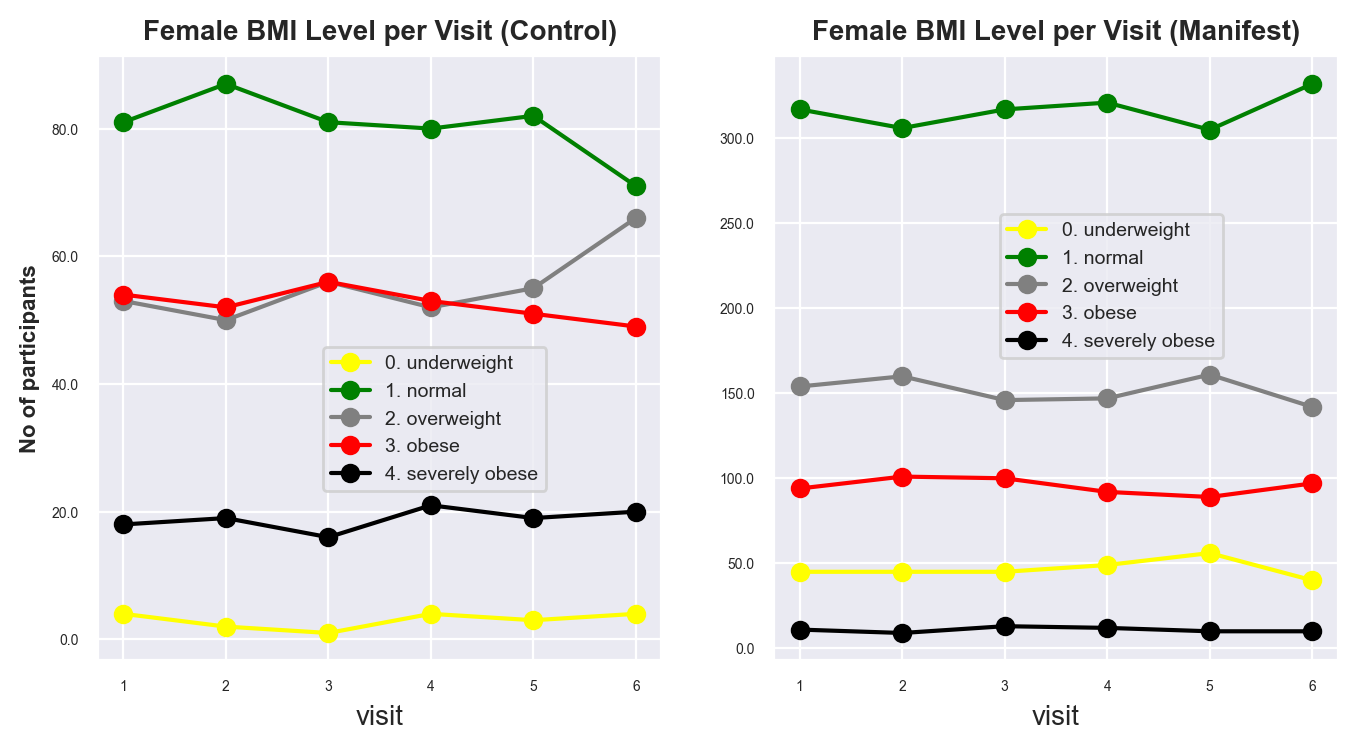

In [31]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=l, marker='o'), 
                 plot_title='Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='line', x='visit', color=proj.bmi_level_cmap, ax=r, marker='o'), 
                 plot_title='Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.5])

In [32]:
# in percentage
ctrl_freq = proj.get_columns_with_pattern(female_control, 
                                          'bmi_level_vis').apply(pd.Series.value_counts,
                                                                 axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
ctrl_freq.loc[:, 'visit'] = np.arange(1, len(ctrl_freq)+1).astype(str)
ctrl_freq = proj.percentage_per_row(ctrl_freq, 'visit', precision=1).reset_index()
display(ctrl_freq)

mnf_freq = proj.get_columns_with_pattern(female_manifest, 
                                         'bmi_level_vis').apply(pd.Series.value_counts,
                                                                axis=0).sort_index(key=lambda col: col.str.split('.').str[0].astype(int)).T
mnf_freq.loc[:, 'visit'] = np.arange(1, len(mnf_freq)+1).astype(str)
mnf_freq = proj.percentage_per_row(mnf_freq, 'visit', precision=1).reset_index()
display(mnf_freq)

,visit,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,1,1.9,38.6,25.2,25.7,8.6
1,2,1.0,41.4,23.8,24.8,9.0
2,3,0.5,38.6,26.7,26.7,7.6
3,4,1.9,38.1,24.8,25.2,10.0
4,5,1.4,39.0,26.2,24.3,9.0
5,6,1.9,33.8,31.4,23.3,9.5


,visit,0. underweight,1. normal,2. overweight,3. obese,4. severely obese
0,1,7.2,51.0,24.8,15.1,1.8
1,2,7.2,49.3,25.8,16.3,1.4
2,3,7.2,51.0,23.5,16.1,2.1
3,4,7.9,51.7,23.7,14.8,1.9
4,5,9.0,49.1,25.9,14.3,1.6
5,6,6.4,53.5,22.9,15.6,1.6


W:\MSc-AIDS-UoH\Trimester_3\project_methods.py:1489: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_yticklabels(np.round(axis.get_yticks(), precision), rotation=rotate_yticklabe, fontdict={'fontsize':xy_ticksize})


<AxesSubplot:title={'center':'%Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

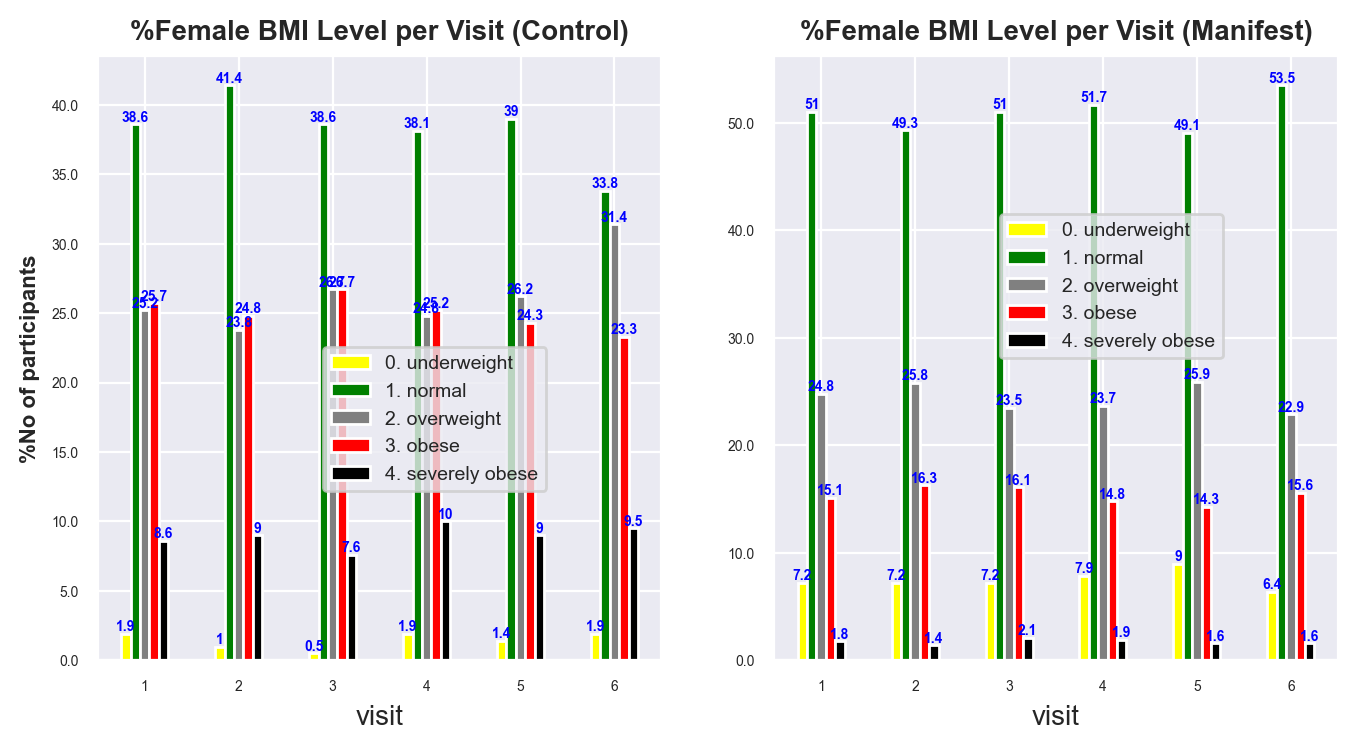

In [33]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.5])

<AxesSubplot:title={'center':'%Female BMI Level per Visit (Manifest)'}, xlabel='visit'>

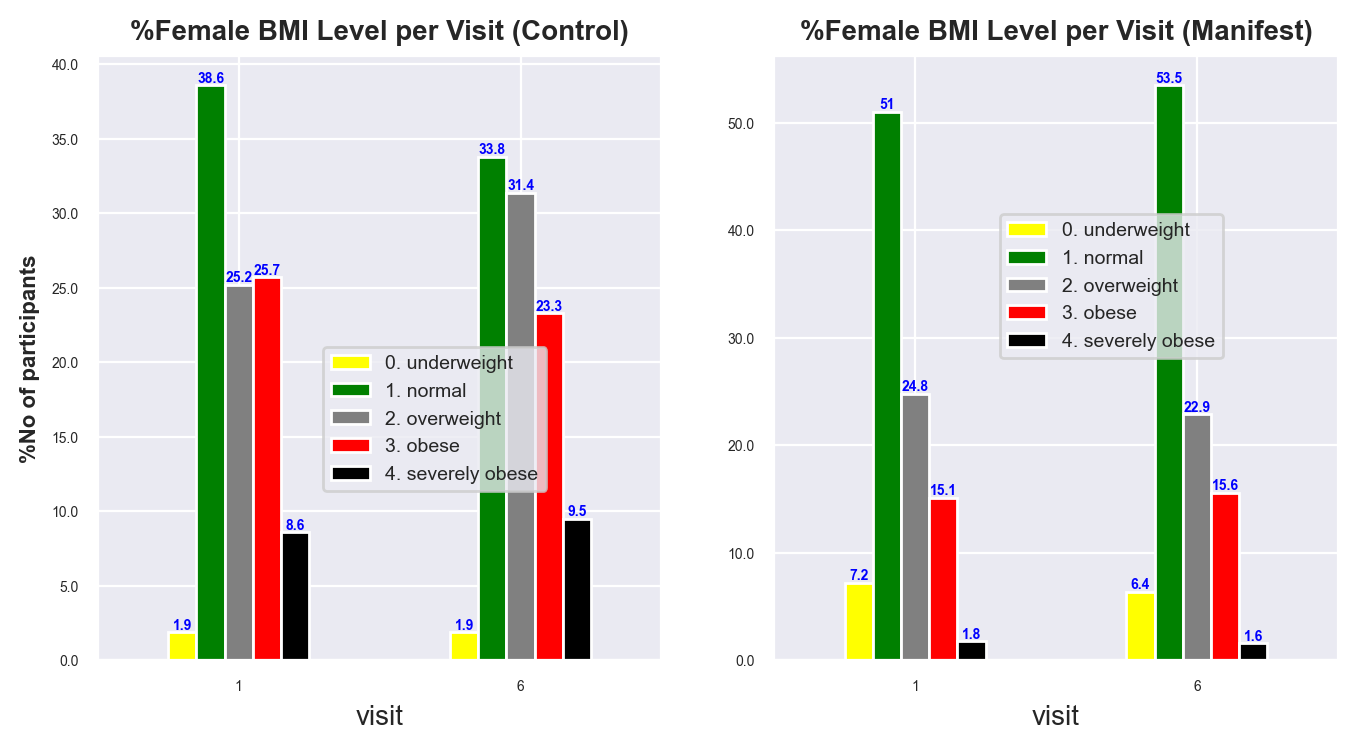

In [34]:
fig, (l, r) = plt.subplots(1, 2, figsize=(8, 4), dpi=200)

proj.adjust_axis(ctrl_freq.loc[ctrl_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=l), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Control)', title_size=10,
                 y_labe='%No of participants', show_legend_at=[0.4, 0.28])

proj.adjust_axis(mnf_freq.loc[mnf_freq['visit'].isin(['1', '6'])].plot(kind='bar', x='visit', color=proj.bmi_level_cmap, ax=r), annotate=True, annot_size=5, 
                 plot_title='%Female BMI Level per Visit (Manifest)', title_size=10, show_legend_at=[0.4, 0.5])

### CAGHIGH BAND

0. normal          275
1. intermediate     19
Name: caghigh_band, dtype: int64

2. reduced penetrance      30
3. full penetrance       1224
Name: caghigh_band, dtype: int64

<AxesSubplot:title={'center':'CAG Repeat Distribution (Manifest)'}>

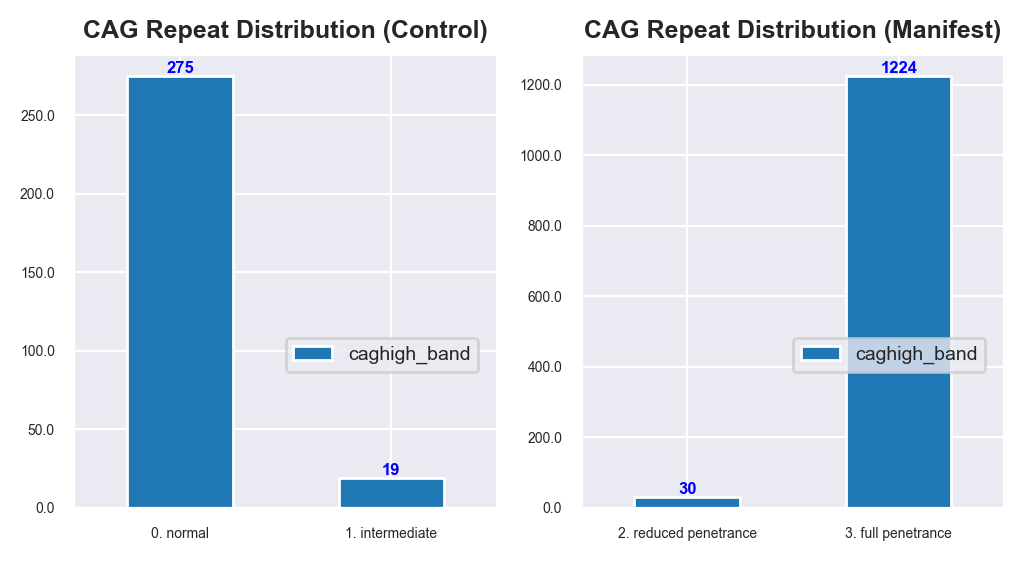

In [35]:
# freq = proj.get_columns_with_pattern(first6_vis,
#                                      'caghigh_').select_dtypes(exclude='object').drop('caghigh_num',
#                                                                                       axis=1).apply(pd.Series.value_counts)
# freq.columns = freq.columns.str.replace('caghigh_', '')
freq = control['caghigh_band'].value_counts().sort_index()
display(freq)
fig, (l, r) = plt.subplots(1, 2, figsize=[6, 3], dpi=200)
proj.adjust_axis(freq.plot(kind='bar', ax=l), plot_title='CAG Repeat Distribution (Control)', 
                 title_size=9, annotate=True, show_legend_at=[0.5, 0.3])

freq = manifest['caghigh_band'].value_counts().sort_index()
display(freq)
proj.adjust_axis(freq.plot(kind='bar', ax=r), plot_title='CAG Repeat Distribution (Manifest)', 
                 title_size=9, annotate=True, show_legend_at=[0.5, 0.3])

caghigh_num                      22.93
caghigh_3. full penetrance       22.70
caghigh_0. normal                18.99
caghigh_1. intermediate           8.90
caghigh_2. reduced penetrance     5.94
dtype: float64

<AxesSubplot:title={'center':'Plot Title'}>

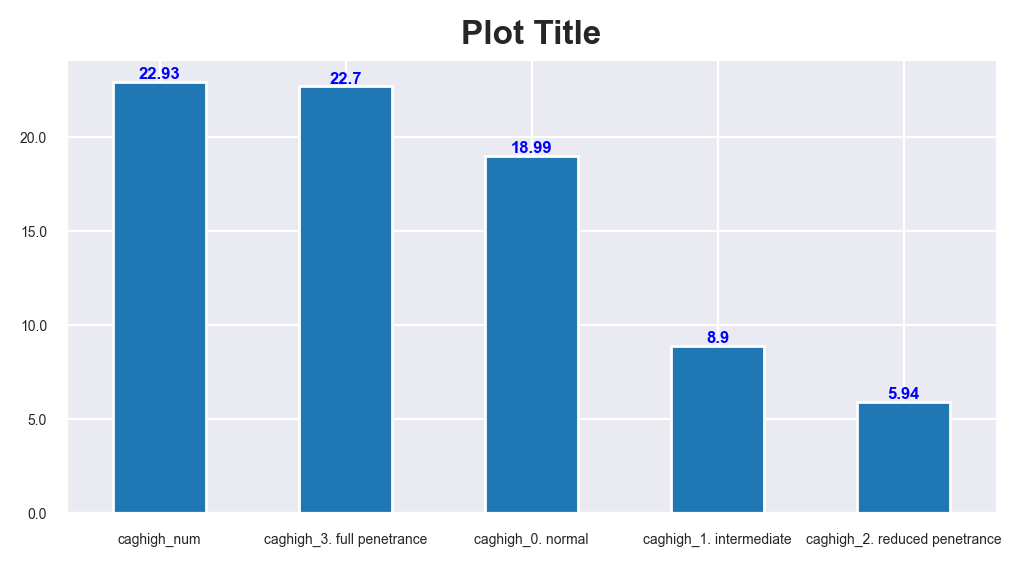

In [36]:
cols = list(proj.get_columns_with_pattern(first6_vis, 'caghigh').columns)
X = first6_vis[cols].select_dtypes(exclude='object')
y = first6_vis['avg_bmi_level'].str.split('.').str[0].astype(int)
corn = proj.corr_with_pearson(X, y)
display(corn)
fig, ax1 = plt.subplots(figsize=[6, 3], dpi=200)
proj.adjust_axis(corn.plot(kind='bar', ax=ax1), annotate=True)

,caghigh_band,bmi_level_vis_1,total_count
0,0. normal,0. underweight,4
1,0. normal,1. normal,102
2,0. normal,2. overweight,77
3,0. normal,3. obese,76
4,0. normal,4. severely obese,16
5,1. intermediate,1. normal,6
6,1. intermediate,2. overweight,7
7,1. intermediate,3. obese,3
8,1. intermediate,4. severely obese,3


KeyError: '0. normal'

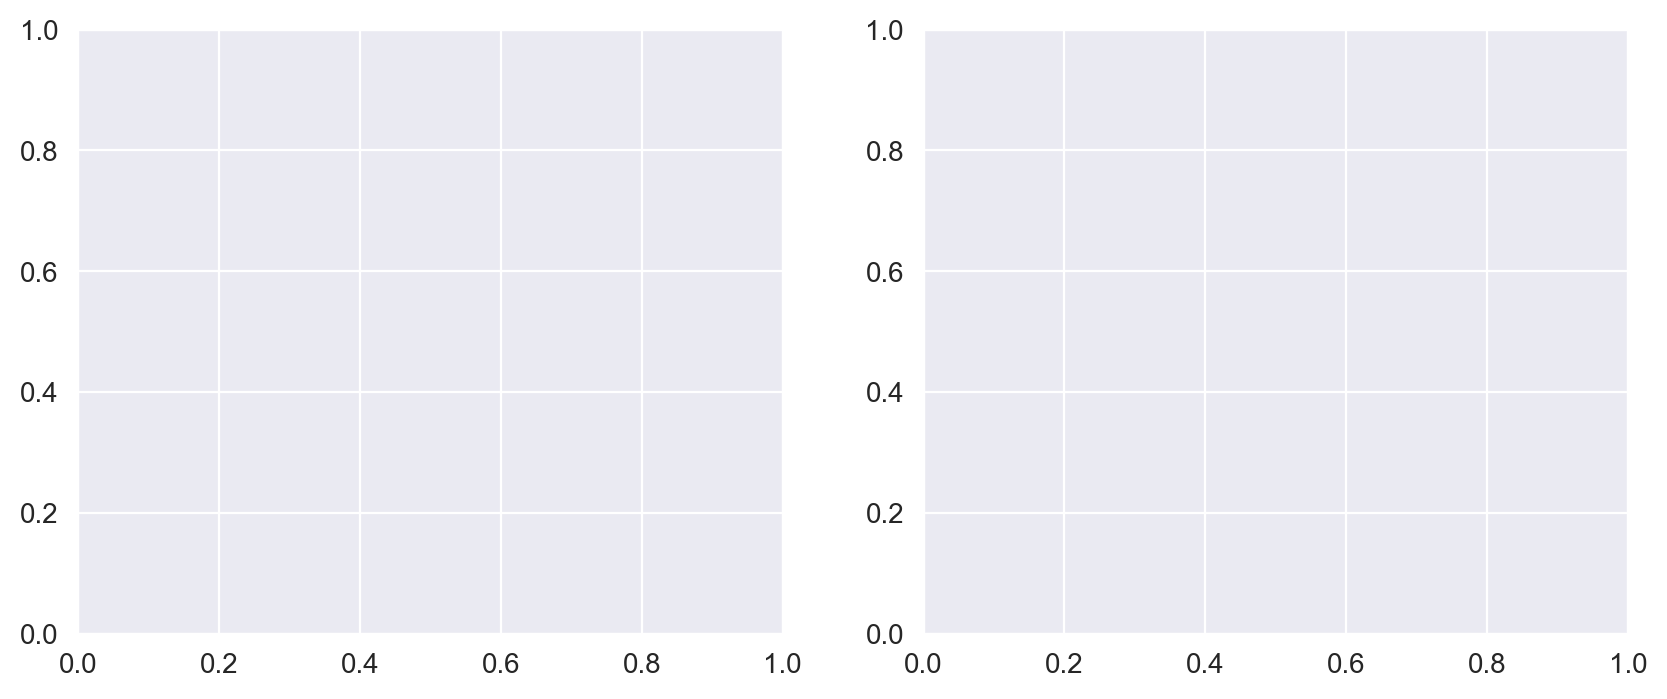

In [37]:
cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(control[cols], cols)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='CAGHIGH Distribution per Baseline BMI (Control)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(manifest[cols], cols)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='CAGHIGH Distribution per Baseline BMI (Manifest)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.2])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(control[cols], cols)
display(freq)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%CAGHIGH Distribution per Baseline BMI (Control)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(manifest[cols], cols)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%CAGHIGH Distribution per Baseline BMI (Manifest)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.05])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_6']
freq = proj.count_occurrences(control[cols], cols)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='CAGHIGH Distribution per Sixth BMI (Control)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(manifest[cols], cols)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='CAGHIGH Distribution per Sixth BMI (Manifest)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.2])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_6']
freq = proj.count_occurrences(control[cols], cols)
display(freq)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%CAGHIGH Distribution per Sixth BMI (Control)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(manifest[cols], cols)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%CAGHIGH Distribution per Sixth BMI (Manifest)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.05])

#### Gender Effect

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_control[cols], cols)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='Male CAGHIGH Distribution per Baseline BMI (Control)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_manifest[cols], cols)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='Male CAGHIGH Distribution per Baseline BMI (Manifest)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.2])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_control[cols], cols).sort_values(by=cols, 
                                                                    key=lambda col: col.str.split('.').str[0].astype(int))
display(freq)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%Male CAGHIGH Distribution per Baseline BMI (Control)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_manifest[cols], cols).sort_values(by=cols, 
                                                                    key=lambda col: col.str.split('.').str[0].astype(int))
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%Male CAGHIGH Distribution per Baseline BMI (Manifest)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.05])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_6']
freq = proj.count_occurrences(male_control[cols], cols)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='Male CAGHIGH Distribution per Sixth BMI (Control)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_manifest[cols], cols).sort_values(by=cols, 
                                                                    key=lambda col: col.str.split('.').str[0].astype(int))
proj.plot_column(x=freq[cols[0]], y=freq['total_count'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='Male CAGHIGH Distribution per Sixth BMI (Manifest)', title_size=9,
                 y_labe='No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.2])

In [ ]:
cols = ['caghigh_band', 'bmi_level_vis_6']
freq = proj.count_occurrences(male_control[cols], cols)
display(freq)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)

fig, (l, r) = plt.subplots(1, 2, figsize=[10, 4], dpi=200)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%Male CAGHIGH Distribution per Sixth BMI (Control)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=l, 
                 show_legend_at=[0.5, 0.2])


cols = ['caghigh_band', 'bmi_level_vis_1']
freq = proj.count_occurrences(male_manifest[cols], cols)
freq = proj.percentage_per_class(freq, 'total_count', 'caghigh_band', precision=1)
display(freq)
proj.plot_column(x=freq[cols[0]], y=freq['perc'], condition_on=freq[cols[-1]], condition_order=order,
                 plot_title='%Male CAGHIGH Distribution per Sixth BMI (Manifest)', title_size=9,
                 y_labe='%No of Participants', paletter=proj.bmi_level_cmap, axis=r, 
                 show_legend_at=[0.15, 0.05])

In [ ]:
stopt